# Diabetes Prediction

## This project is about creating a system that can predict the risk of diabetes using health data. The goal is to take raw information—like a person's age, weight, and medical history—and turn it into useful insights that doctors and individuals can use to assess their chances of developing diabetes.

## Dataset Description:- 100000 entry & 9 columns
### 1-Gender: Patient gender.
### 2-Age: Patients Age.
### 3-Hypertension: High Blood Pressure.
### 4-Heart_disease: Patient has a heart disease or not (1-Yes, 0-No).
### 5-Smoking_history: Indicates if the patient has a history with Smoking or not.
### 6-BMI: Body Mass Index.
### 7-Avg_blood_sugar: Measures how much glucose is attached to hemoglobin (the protein in red blood cells that carries oxygen).
### 8-blood_glucose_level: Patients glucose level.
### 9-Diabetes: Target Variable - Indicates weather the patient si diabetic or not (1-Yes , 0-No).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Collection

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
print('Data Loaded Successfully !')

Data Loaded Successfully !


## Dataset Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
print('Dataset shape: ',df.shape)
print('Datasetcolumns: ',df.columns)

Dataset shape:  (100000, 9)
Datasetcolumns:  Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


## Checking for Null Values

In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

## Checking for Duplicates

In [7]:
df.duplicated().sum()

np.int64(3854)

## Droping Duplicates

In [8]:
df = df.drop_duplicates()

## Dataset Summary

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


## Feature Engineering

In [10]:
df.rename(columns={'HbA1c_level': 'Avg_blood_sugar'}, inplace=True)
df['age'] = df['age'].astype(int)

df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,Avg_blood_sugar,blood_glucose_level,diabetes
0,Female,80,0,1,never,25.19,6.6,140,0
1,Female,54,0,0,No Info,27.32,6.6,80,0
2,Male,28,0,0,never,27.32,5.7,158,0
3,Female,36,0,0,current,23.45,5.0,155,0
4,Male,76,1,1,current,20.14,4.8,155,0


## Handling Outliers

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\3525008850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['age'],palette='coolwarm')


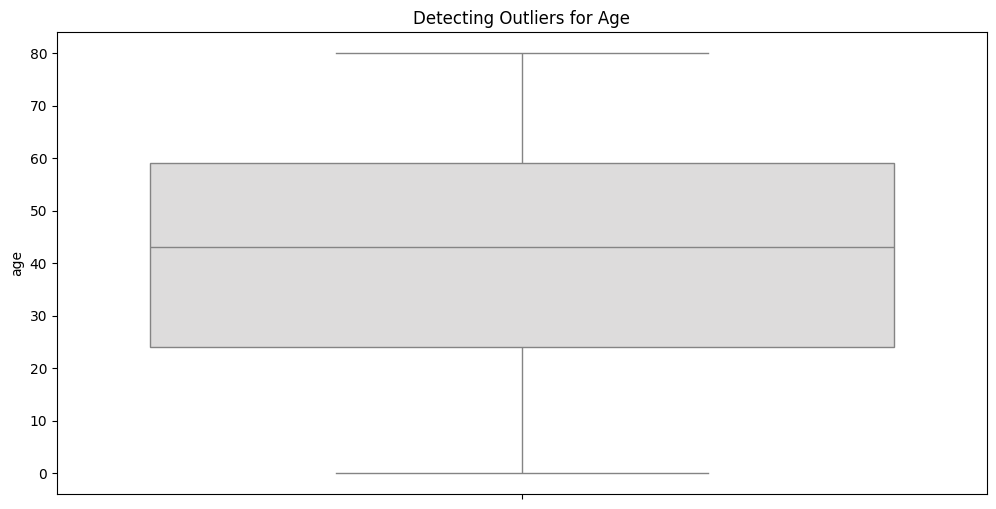

In [11]:
plt.figure(figsize=(12 , 6))
sns.boxplot(df['age'],palette='coolwarm')
plt.title('Detecting Outliers for Age')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2388130032.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['bmi'],palette='coolwarm')


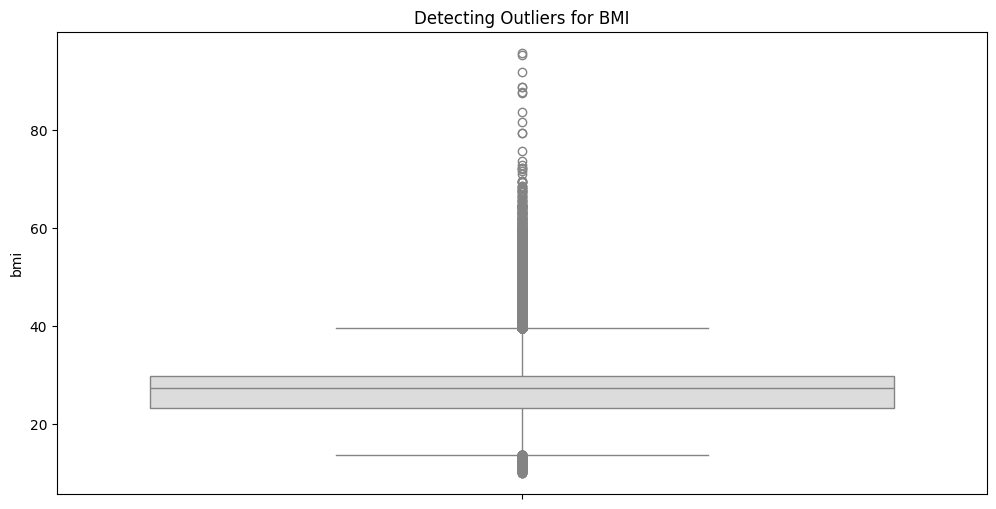

In [12]:
plt.figure(figsize=(12 , 6))
sns.boxplot(df['bmi'],palette='coolwarm')
plt.title('Detecting Outliers for BMI')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\3169511729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['Avg_blood_sugar'],palette='coolwarm')


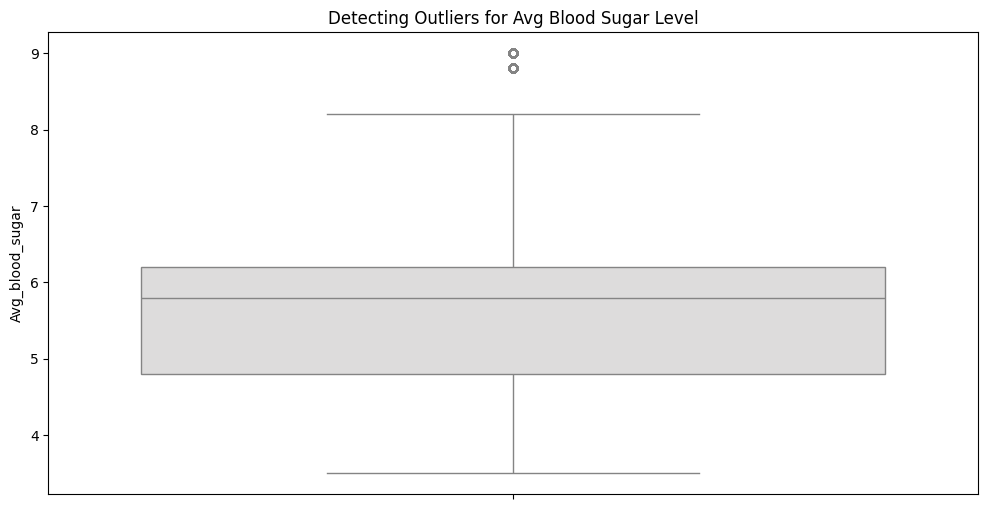

In [13]:
plt.figure(figsize=(12 , 6))
sns.boxplot(df['Avg_blood_sugar'],palette='coolwarm')
plt.title('Detecting Outliers for Avg Blood Sugar Level')
plt.show()

In [14]:
# Compute Q1 (25%) and Q3 (75%)
Q1 = df["bmi"].quantile(0.25)
Q3 = df["bmi"].quantile(0.75)

# Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df["bmi"] < lower_bound) | (df["bmi"] > upper_bound)]
print(f"No. of Outliers in BMI: {len(outliers)}")

No. of Outliers in BMI: 5354


## Normalization

In [15]:
df=df[df['bmi']<50]
df=df[df['bmi']>14]

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2281371025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['bmi'], palette="coolwarm")


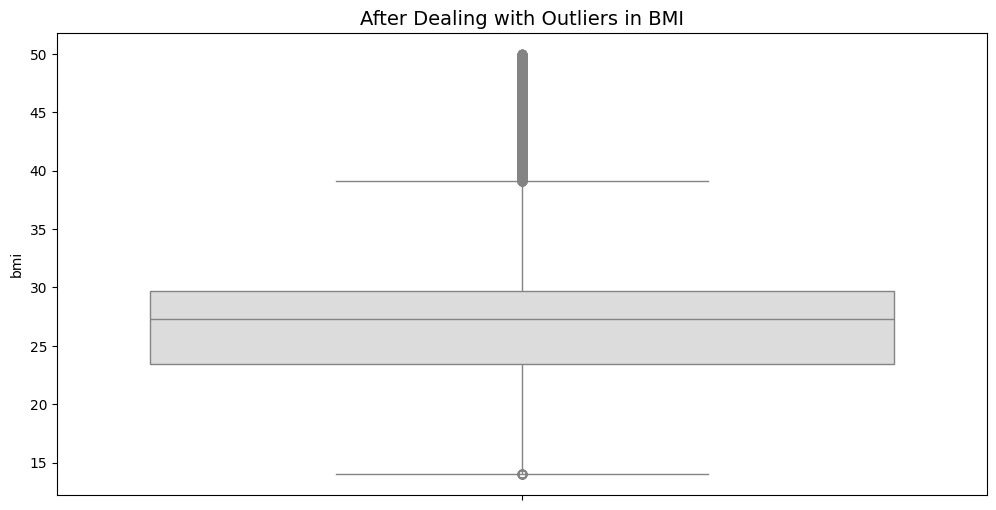

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(df['bmi'], palette="coolwarm")
plt.title("After Dealing with Outliers in BMI", fontsize=14)
plt.show()

## Counting Outliers in age & Avg_blood_sugar

In [17]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df['age']))
z_score = np.abs(stats.zscore(df['Avg_blood_sugar']))
outliers = df[z_scores > 3]
outliers2 = df[z_score > 3]
num_outliers = len(outliers)
num_outliers2 = len(outliers2)
print("Number of outliers in Age:", num_outliers)
print("Number of outliers in Avg_blood_suar:", num_outliers2)

Number of outliers in Age: 0
Number of outliers in Avg_blood_suar: 1277


In [18]:
df['gender'].value_counts()

gender
Female    55262
Male      39519
Other        18
Name: count, dtype: int64

In [19]:
df['gender'].replace('Other', 'Male', inplace=True)
df['gender'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\964953178.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace('Other', 'Male', inplace=True)


gender
Female    55262
Male      39537
Name: count, dtype: int64

In [20]:
df['smoking_history'].value_counts()

smoking_history
never          34011
No Info        32242
former          9176
current         9109
not current     6299
ever            3962
Name: count, dtype: int64

## Univariate Analaysis

### Distribution of Gender

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\1477682496.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df , palette='viridis')


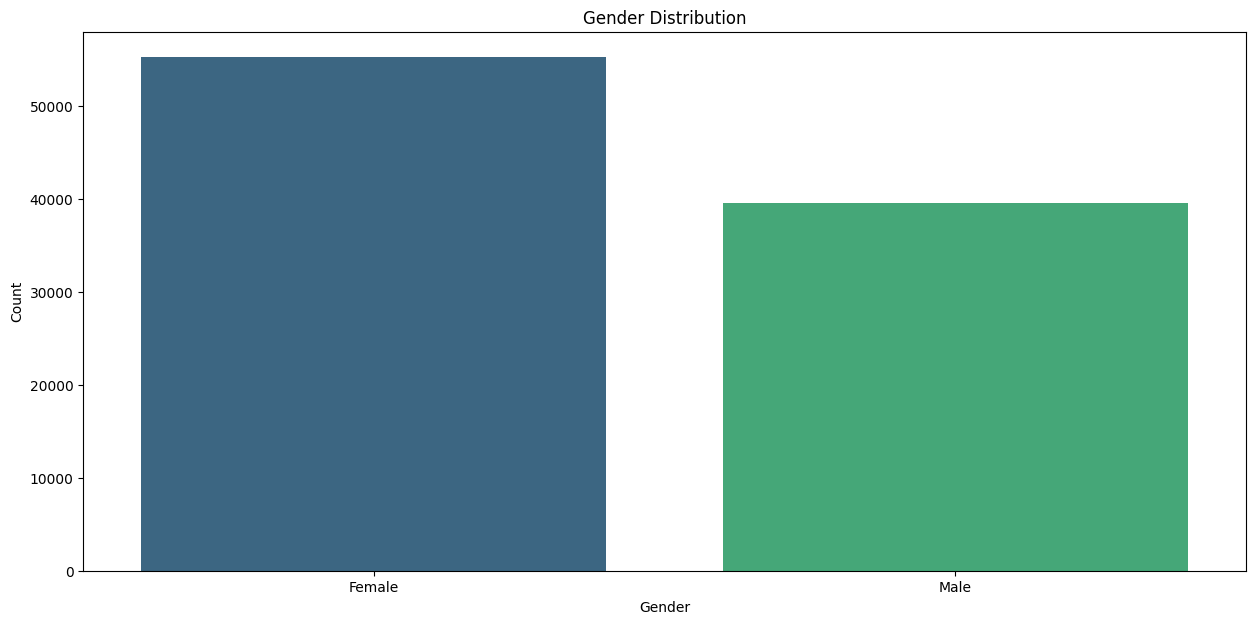

gender
Female    55262
Male      39537
Name: count, dtype: int64

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(x='gender', data=df , palette='viridis')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


df['gender'].value_counts()

#### Distribution of Age

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\1392308266.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='age', data=df , bins=15 , kde=True , palette='viridis')


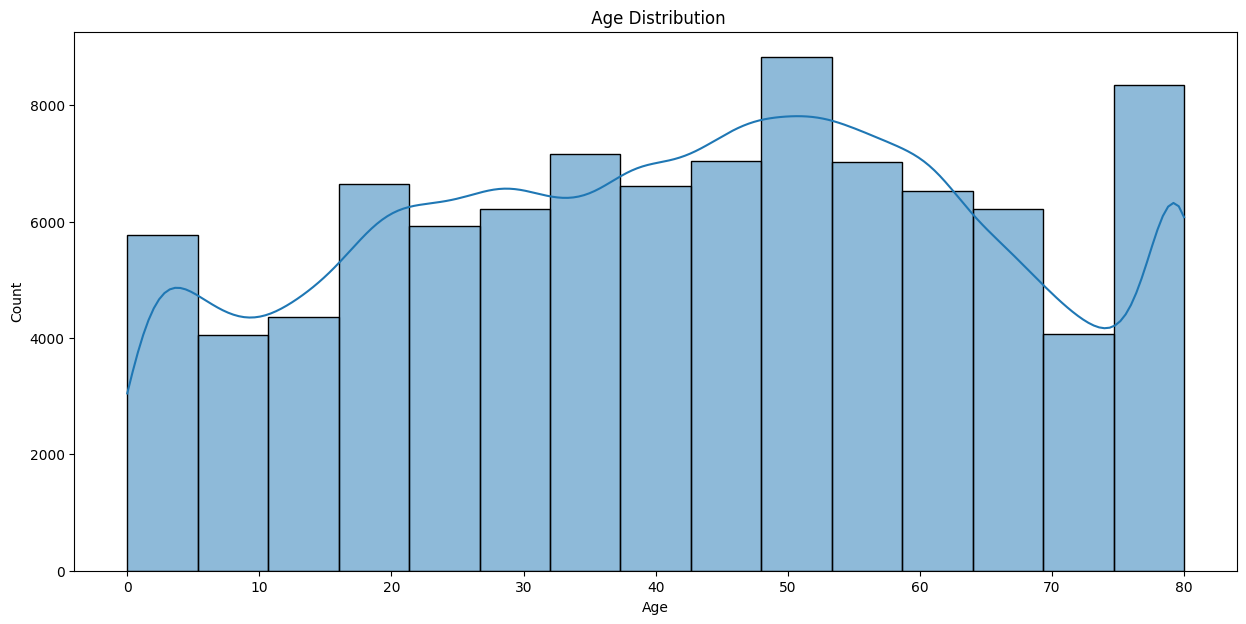

In [22]:
plt.figure(figsize=(15, 7))
sns.histplot(x='age', data=df , bins=15 , kde=True , palette='viridis')
plt.title(" Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Smoking History Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\1148881523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df , palette='viridis')


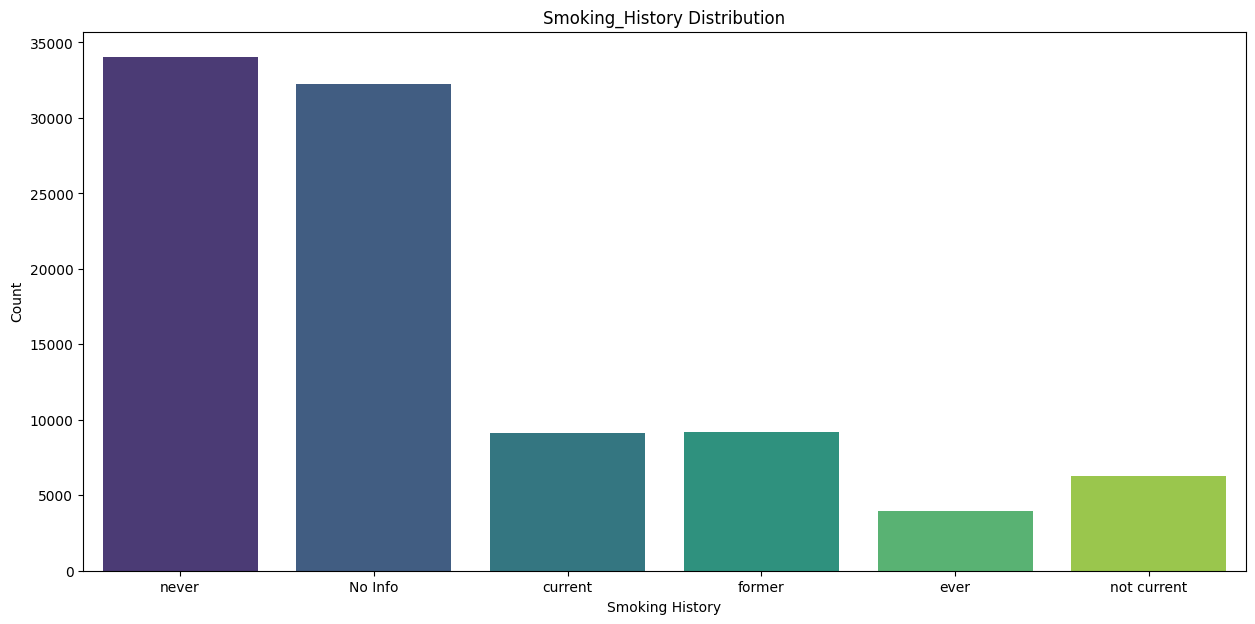

smoking_history
never          34011
No Info        32242
former          9176
current         9109
not current     6299
ever            3962
Name: count, dtype: int64

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(x='smoking_history', data=df , palette='viridis')
plt.title("Smoking_History Distribution")
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.show()


df['smoking_history'].value_counts()

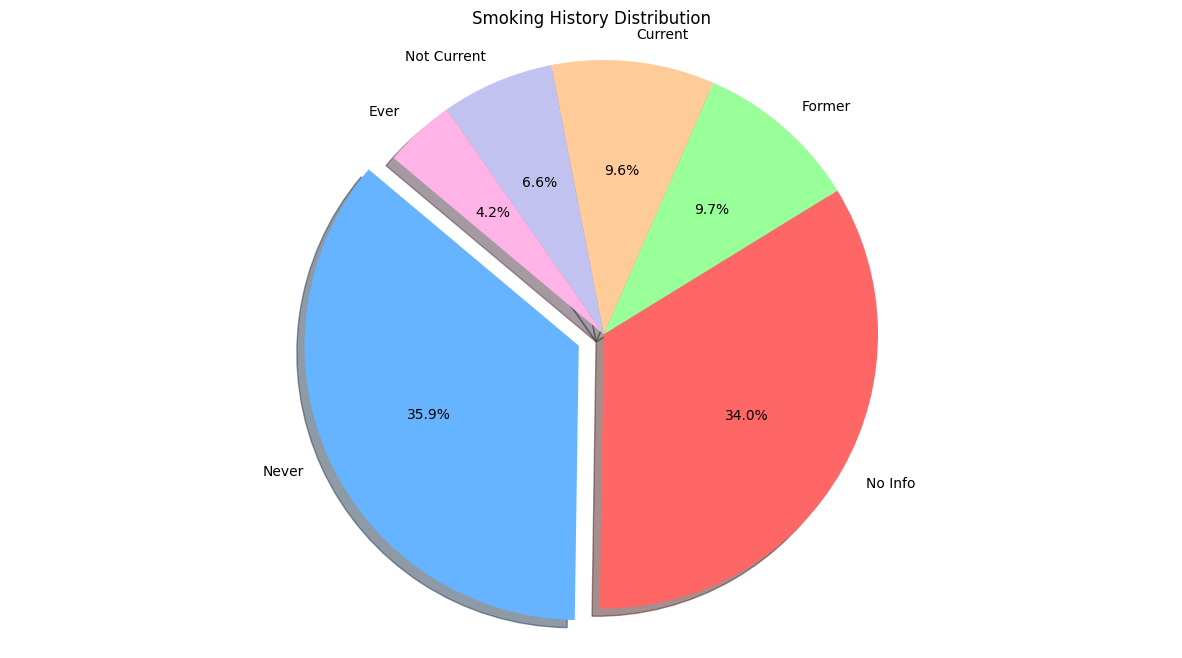

In [24]:
labels = ['Never', 'No Info', 'Former', 'Current', 'Not Current', 'Ever']
sizes = [34011, 32242, 9176, 9109, 6299, 3962]
colors = ['#66b3ff', '#ff6666', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']  # Colors for each category
explode = (0.1, 0, 0, 0, 0, 0) 
plt.figure(figsize=(15, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Smoking History Distribution')
plt.axis('equal')
plt.show()

### Heart Disease Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\518556098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df , palette='viridis')


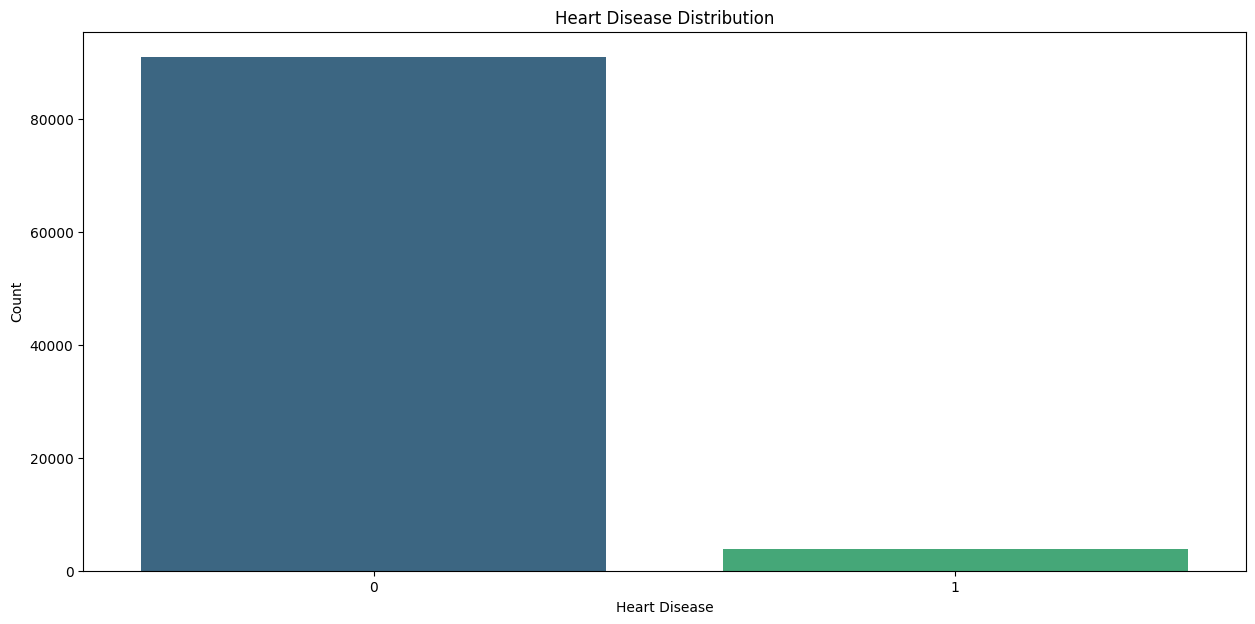

heart_disease
0    90907
1     3892
Name: count, dtype: int64

In [25]:
plt.figure(figsize=(15, 7))
sns.countplot(x='heart_disease', data=df , palette='viridis')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()


df['heart_disease'].value_counts()

### BMI Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\3525416583.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='bmi', data=df , palette='viridis' , bins=15,kde=True)


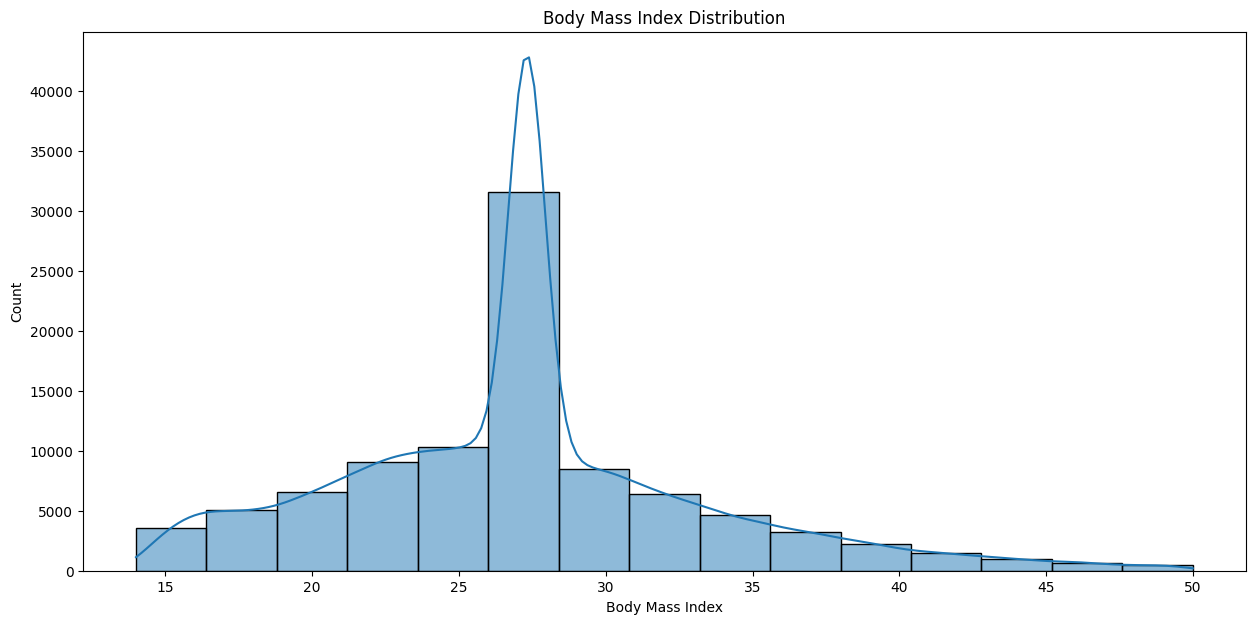


## Key Insights: 
1- Underweight: BMI < 18.5
2- Normal Weight: BMI >= 18.5 || BMI <= 24.9
3- Overweight: BMI >= 25 || BMI <= 29.9
4- Obese: BMI >= 40


In [26]:
plt.figure(figsize=(15, 7))
sns.histplot(x='bmi', data=df , palette='viridis' , bins=15,kde=True)
plt.title("Body Mass Index Distribution")
plt.xlabel("Body Mass Index")
plt.ylabel("Count")
plt.show()



print("\n## Key Insights: ")
print("1- Underweight: BMI < 18.5")
print("2- Normal Weight: BMI >= 18.5 || BMI <= 24.9")
print("3- Overweight: BMI >= 25 || BMI <= 29.9")
print("4- Obese: BMI >= 40")

### Average blood Sugar Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2173337575.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='Avg_blood_sugar', data=df , palette='viridis' , kde=True , bins=15)


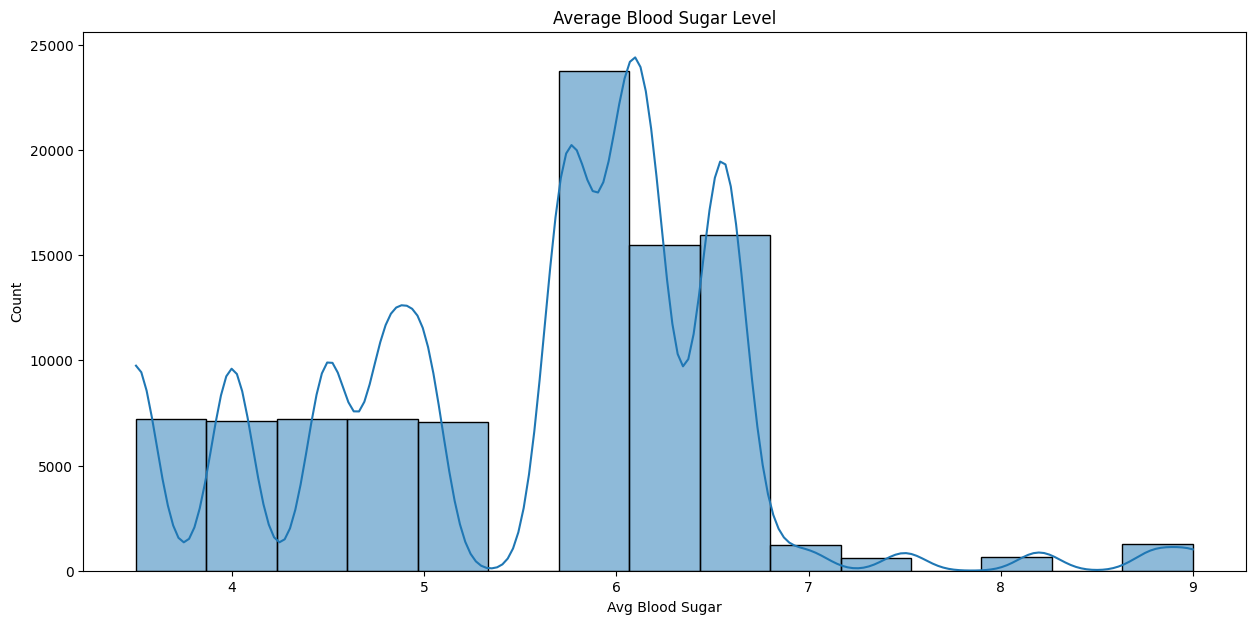

In [27]:
plt.figure(figsize=(15, 7))
sns.histplot(x='Avg_blood_sugar', data=df , palette='viridis' , kde=True , bins=15)
plt.title("Average Blood Sugar Level")
plt.xlabel("Avg Blood Sugar")
plt.ylabel("Count")
plt.show()

### Blood Glucose Level Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\1421160662.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='blood_glucose_level', data=df , palette='viridis' , kde=True , bins=15)


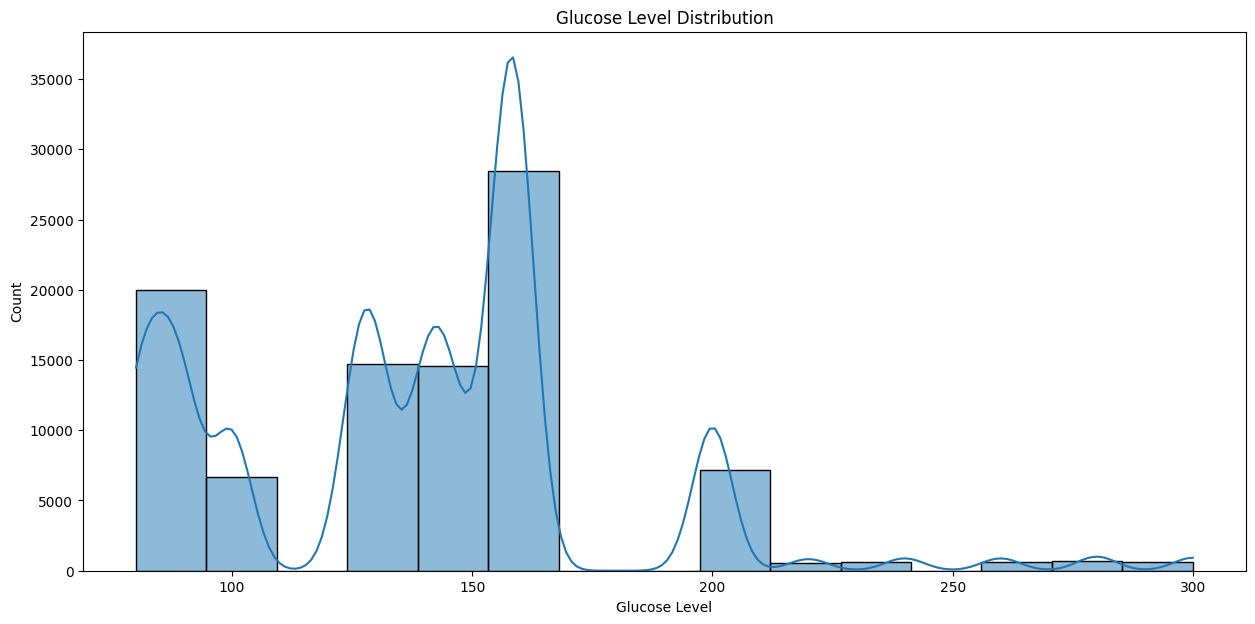

In [28]:
plt.figure(figsize=(15, 7))
sns.histplot(x='blood_glucose_level', data=df , palette='viridis' , kde=True , bins=15)
plt.title("Glucose Level Distribution")
plt.xlabel("Glucose Level")
plt.ylabel("Count")
plt.show()

### Diabetes Distribution

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\3667478297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df , palette='viridis')


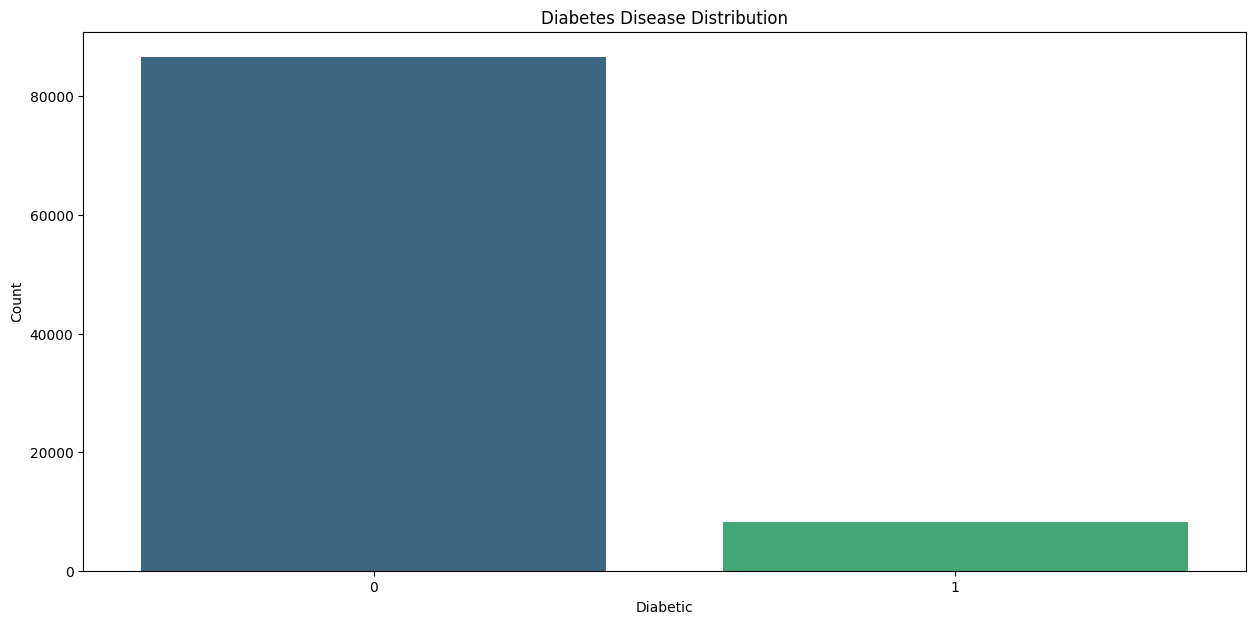

diabetes
0    86558
1     8241
Name: count, dtype: int64

In [29]:
plt.figure(figsize=(15, 7))
sns.countplot(x='diabetes', data=df , palette='viridis')
plt.title("Diabetes Disease Distribution")
plt.xlabel("Diabetic")
plt.ylabel("Count")
plt.show()


df['diabetes'].value_counts()

## Bivariate Analysis: Numerical Features

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2898635179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes',y=feature,data=df,palette='viridis')


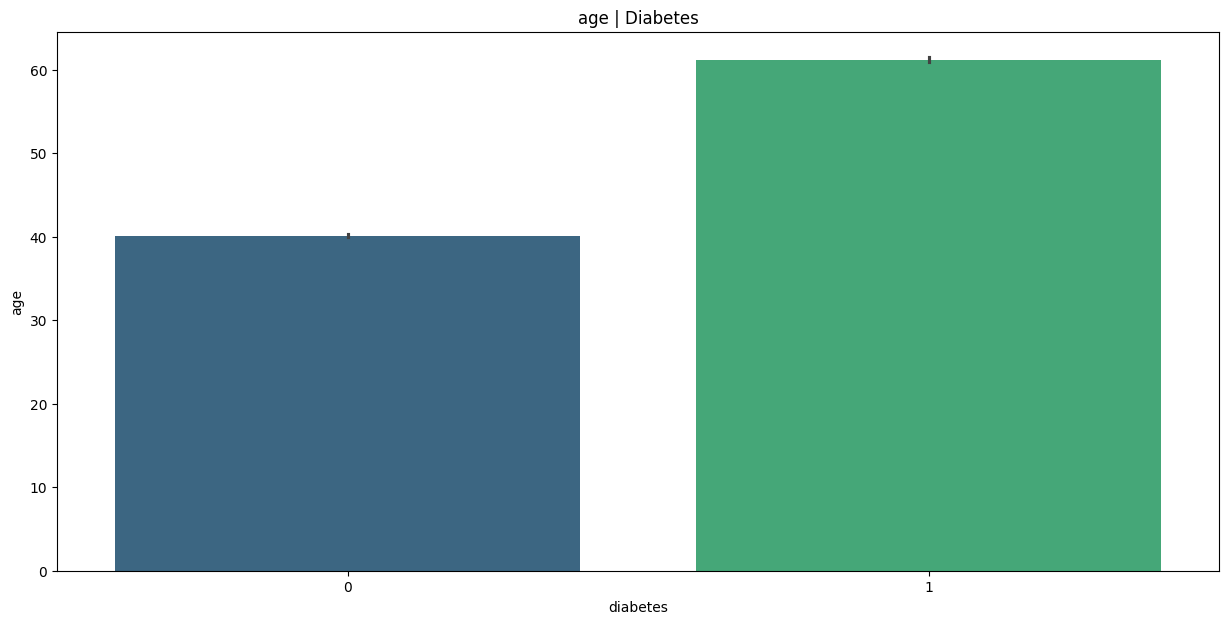

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2898635179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes',y=feature,data=df,palette='viridis')


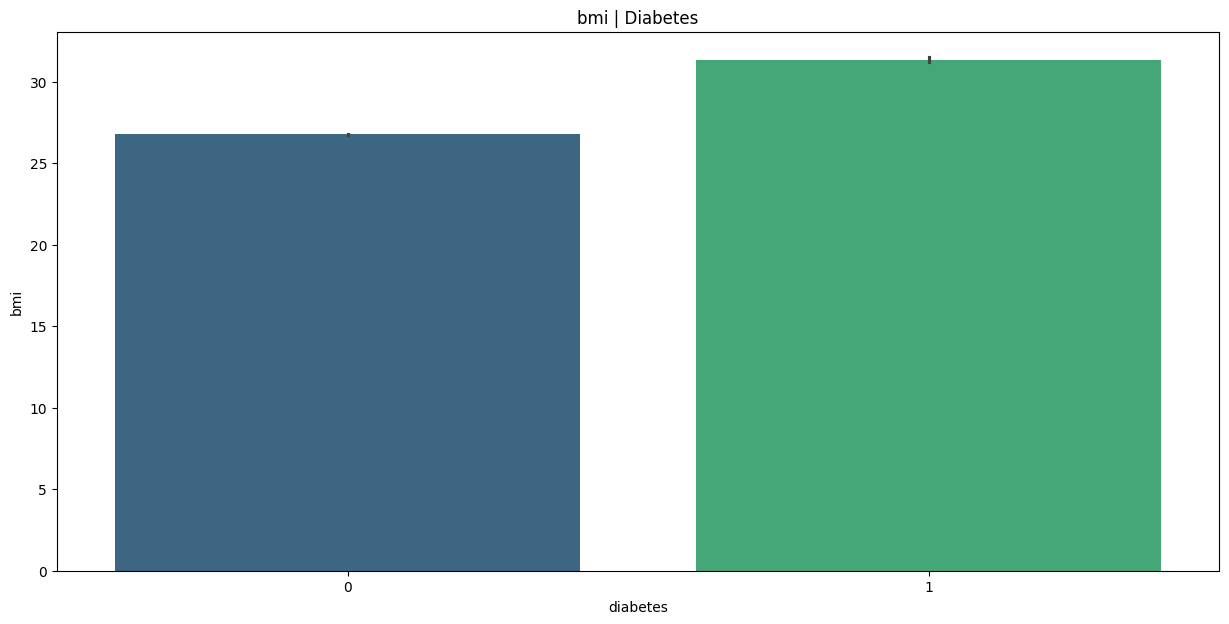

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2898635179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes',y=feature,data=df,palette='viridis')


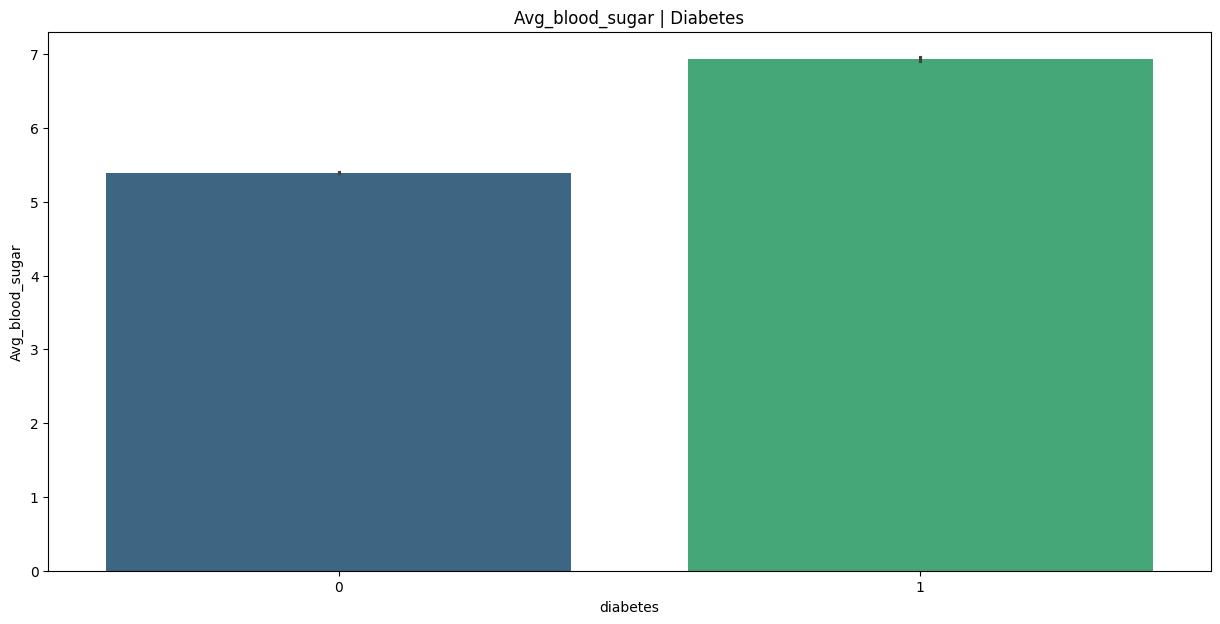

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\2898635179.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes',y=feature,data=df,palette='viridis')


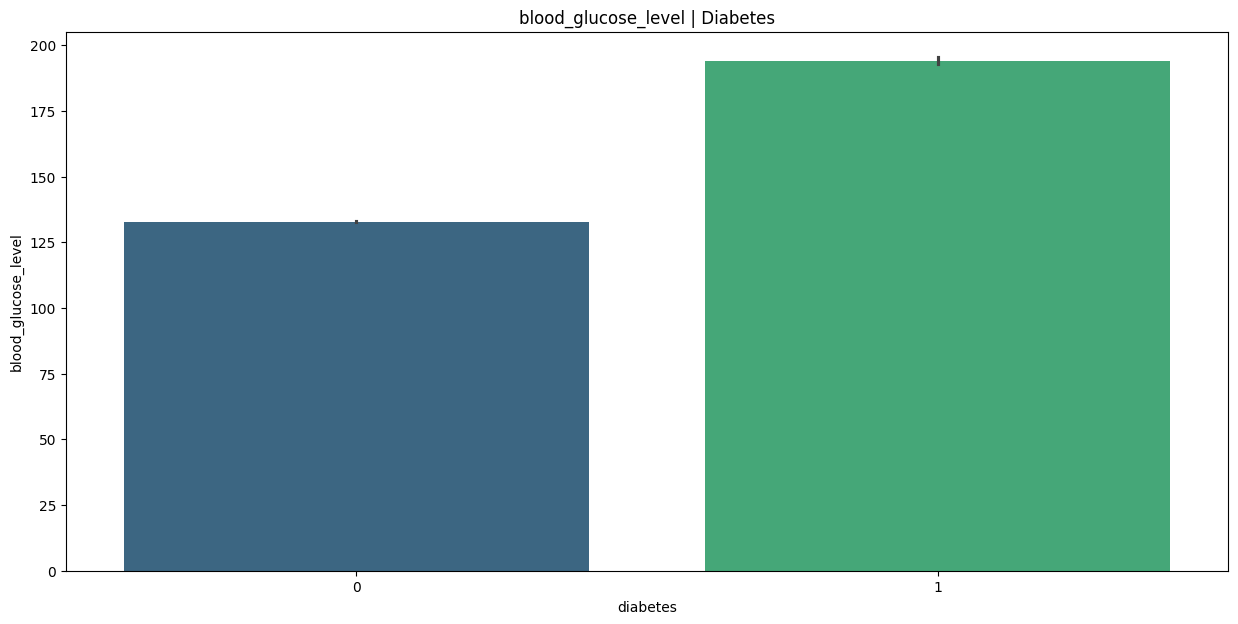

In [55]:
numerical_cols = ['age','bmi','Avg_blood_sugar','blood_glucose_level']
for feature in numerical_cols:
    plt.figure(figsize=(15 , 7))
    sns.barplot(x='diabetes',y=feature,data=df,palette='viridis')
    plt.title(f"{feature} | Diabetes")
    plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\3419411323.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



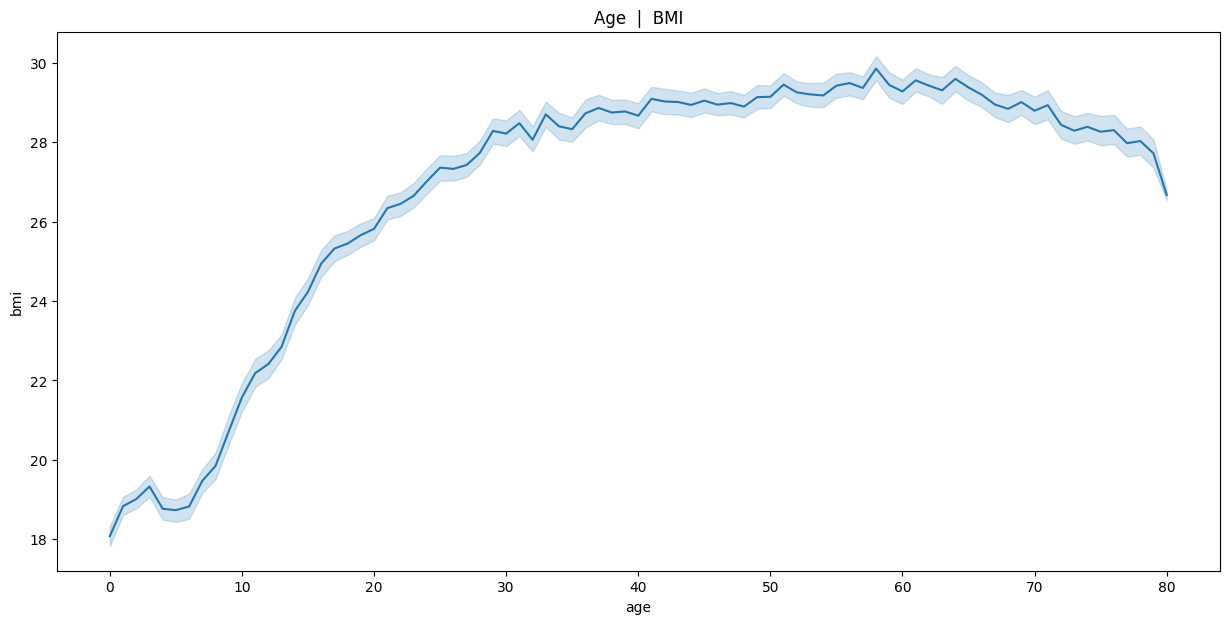

In [59]:
import plotly.express as px

plt.figure(figsize=(15,7))
sns.lineplot(x='age',y='bmi',data=df,palette='viridis')
plt.title("Age  |  BMI")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_8680\861652622.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='Avg_blood_sugar',y='blood_glucose_level',data=df,palette='viridis')


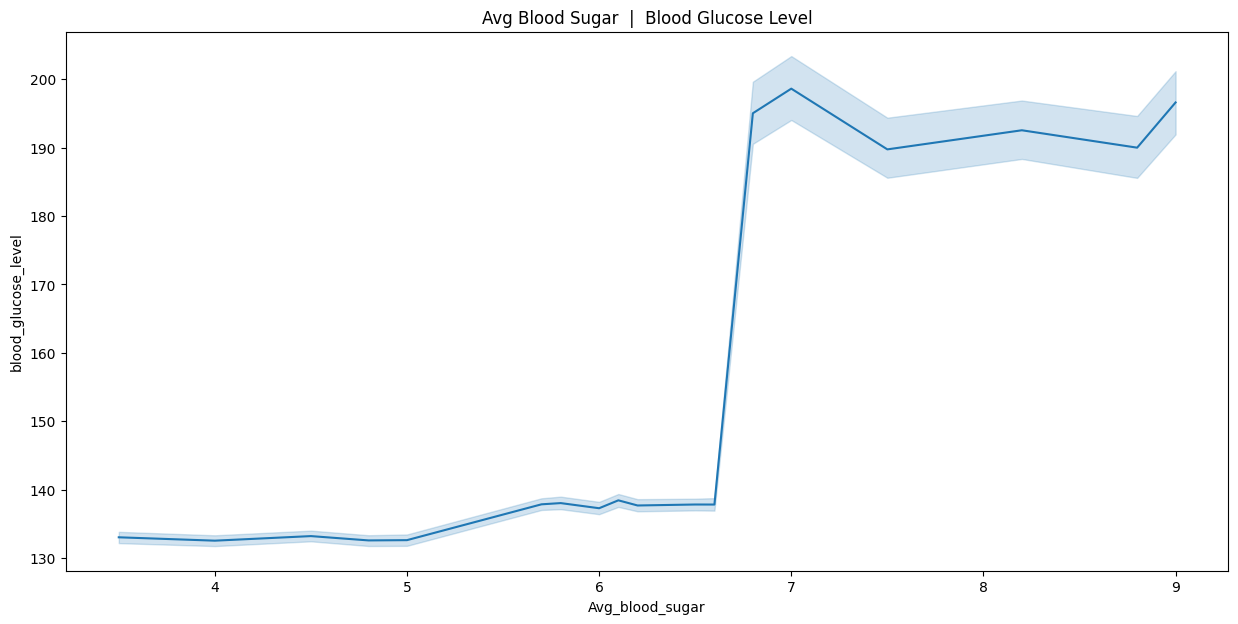

In [32]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Avg_blood_sugar',y='blood_glucose_level',data=df,palette='viridis')
plt.title("Avg Blood Sugar  |  Blood Glucose Level")
plt.show()

## Bivariate Analysis: Categorical Features

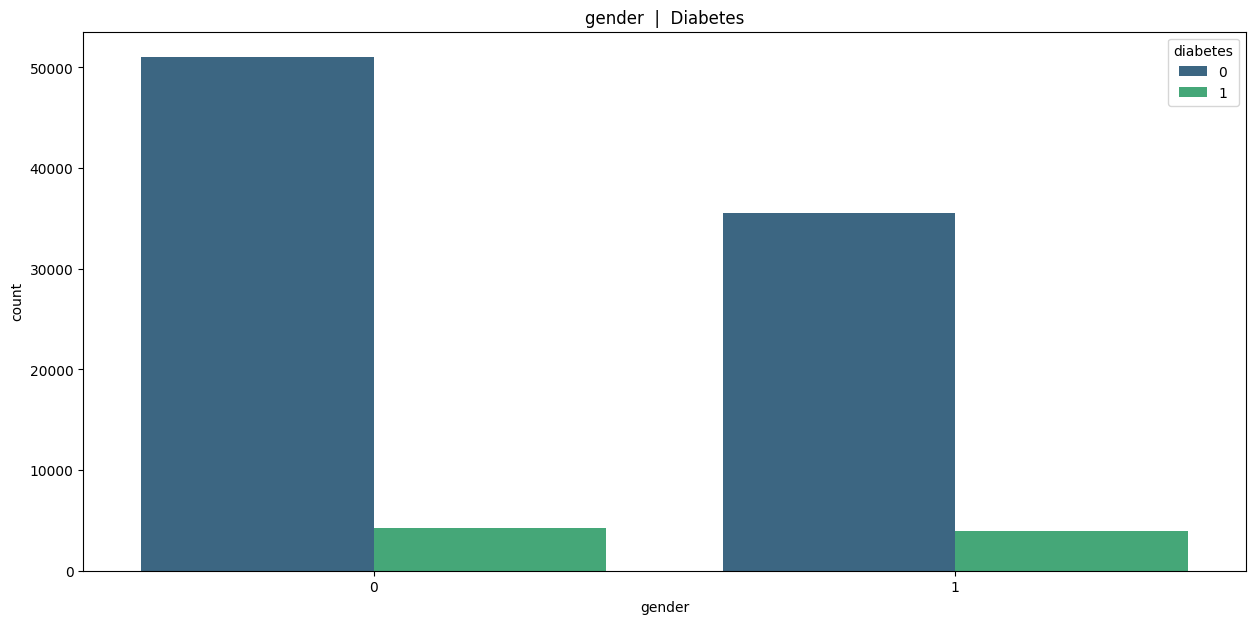

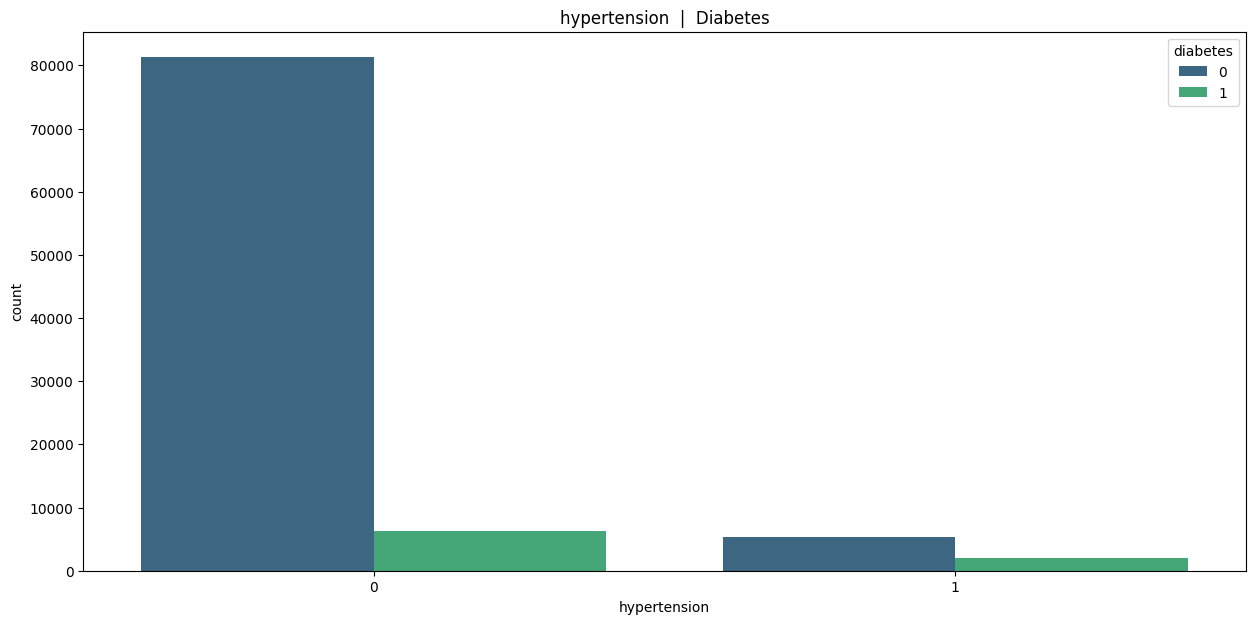

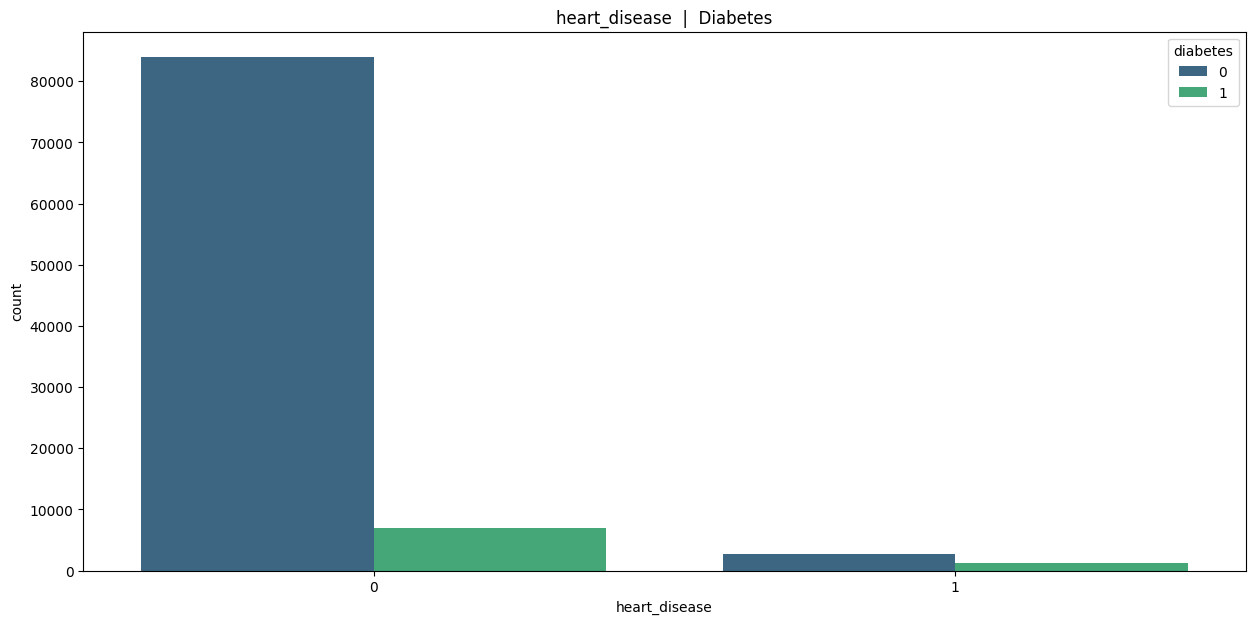

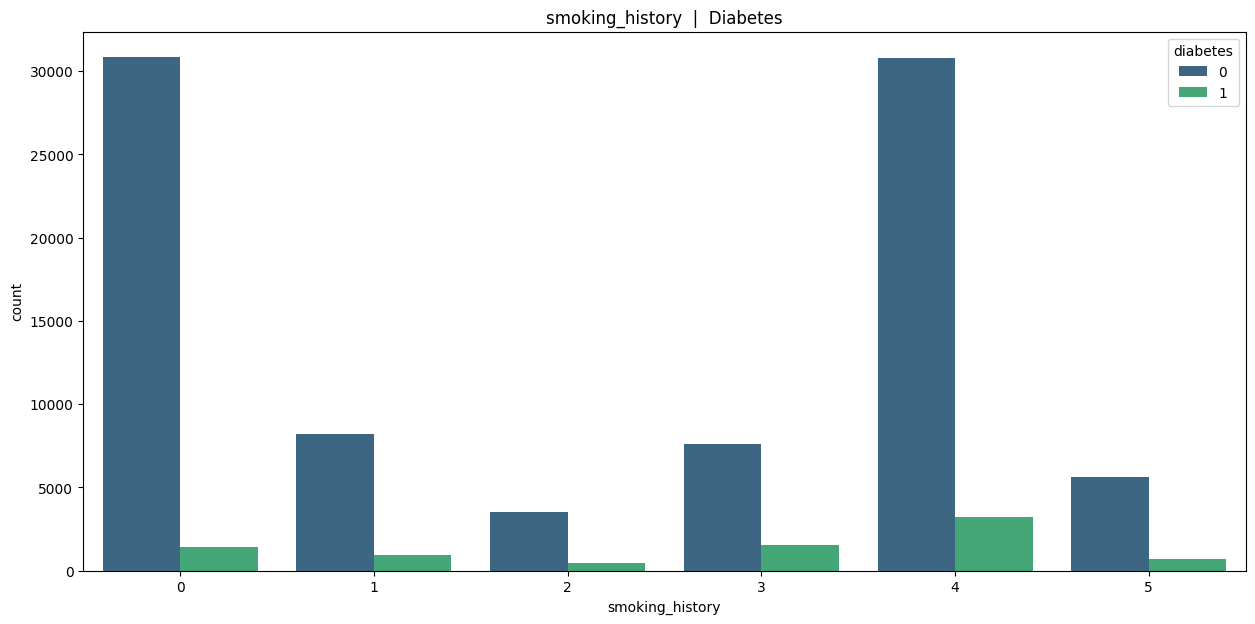

In [60]:
categorical_cols = ['gender','hypertension','heart_disease','smoking_history']
for feature in categorical_cols:
    plt.figure(figsize=(15 , 7))
    sns.countplot(x=feature,hue='diabetes',data=df,palette='viridis')
    plt.title(f'{feature}  |  Diabetes')
    plt.show()

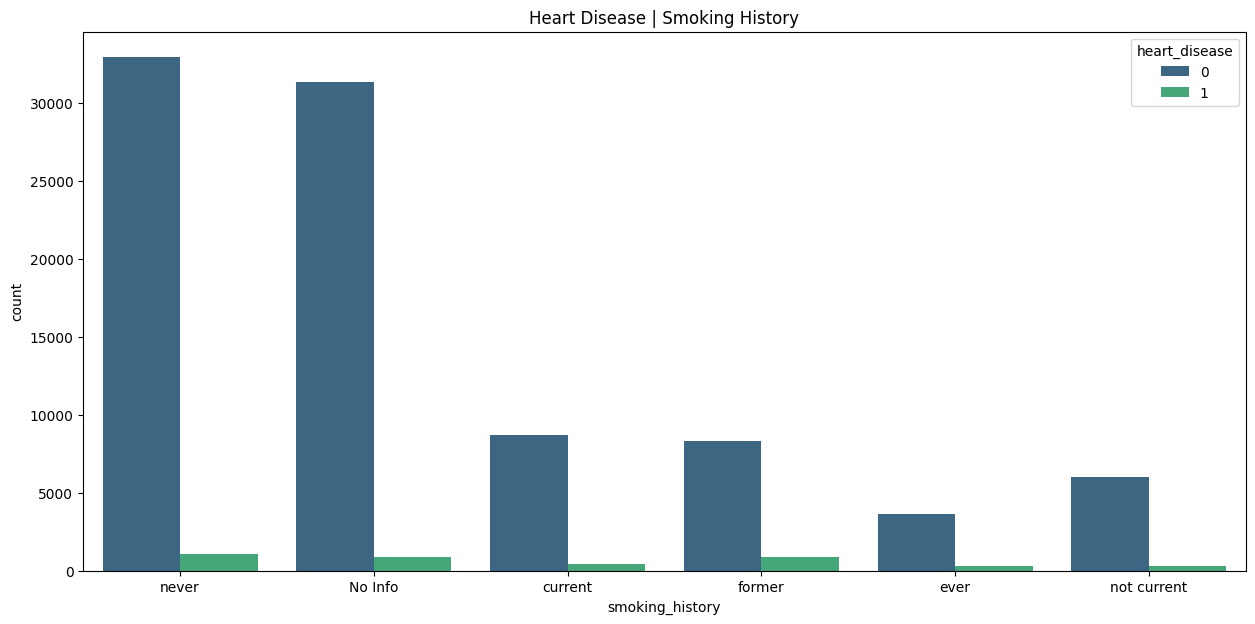

In [34]:
plt.figure(figsize=(15,7))
sns.countplot(x='smoking_history',hue='heart_disease',data=df,palette='viridis')
plt.title("Heart Disease | Smoking History")
plt.show()

## Multivariate Analysis

### Pairplot 

<Figure size 1500x800 with 0 Axes>

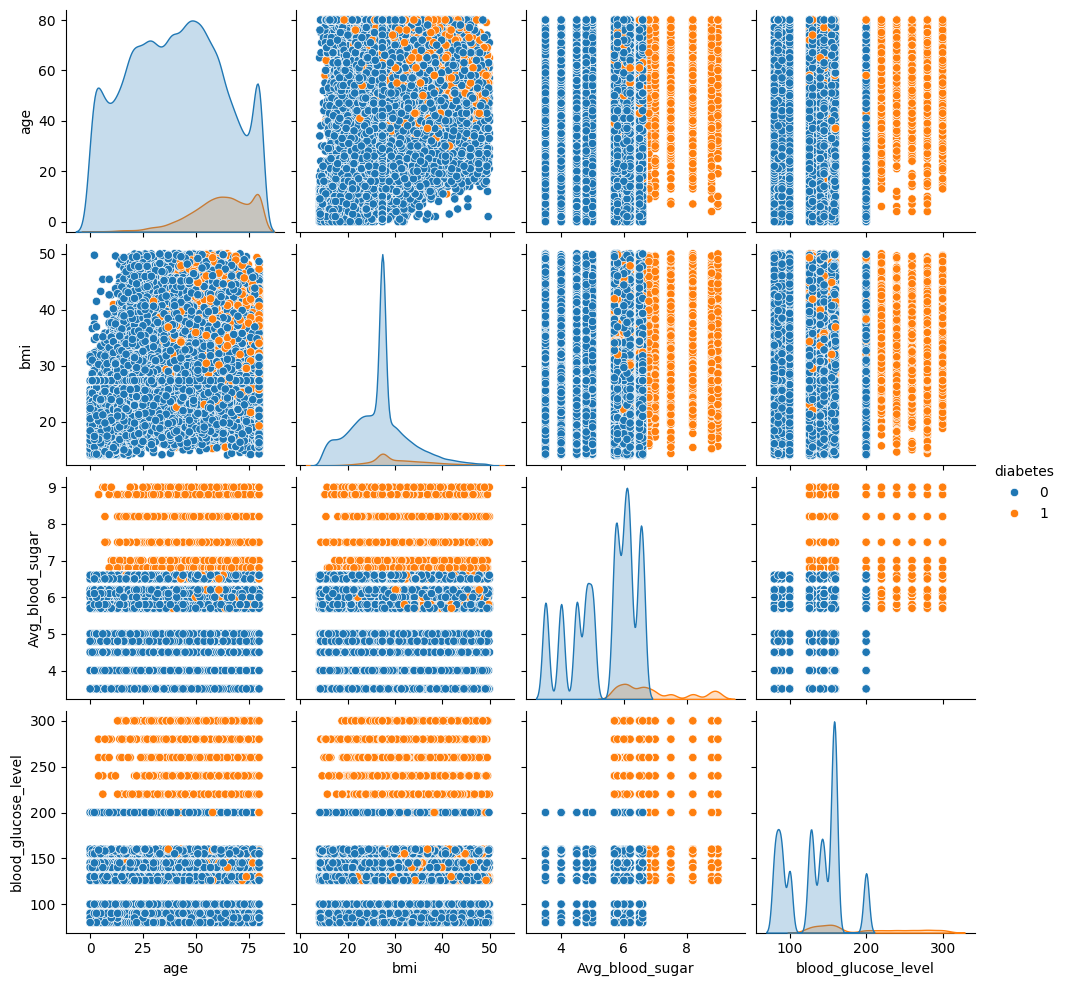

In [35]:
plt.figure(figsize=(15 , 8))
sns.pairplot(df,hue='diabetes',vars=numerical_cols)
plt.show()

### Correlation Matrix: using Numerical Features

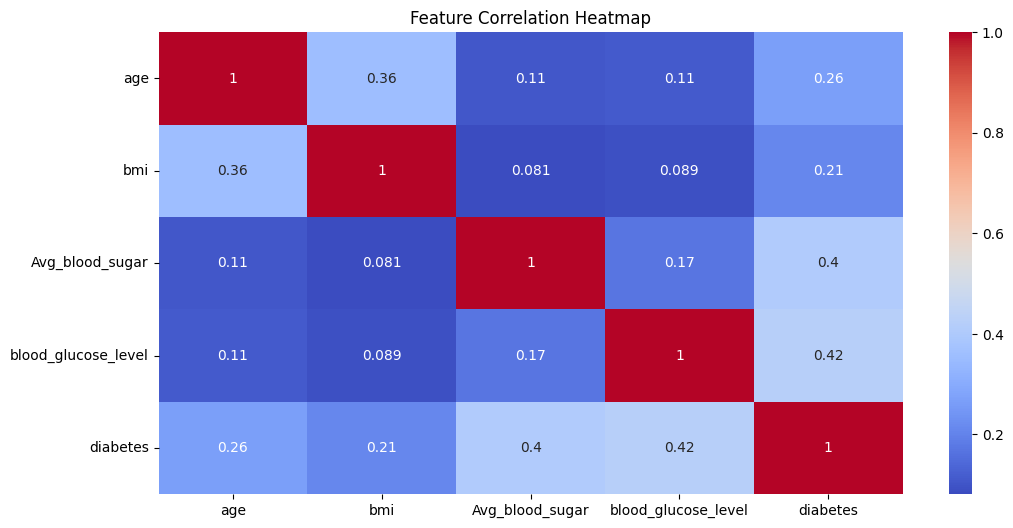

In [36]:
num_cols = ['age','bmi','Avg_blood_sugar','blood_glucose_level','diabetes']
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

## Encoding Categorical Features

In [37]:
from sklearn.preprocessing import LabelEncoder

categroical_features = [i for i in df.columns if df[i].dtypes == 'object']
for i in categroical_features:
    encode = LabelEncoder()
    df[i] = encode.fit_transform(df[i])
 
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,Avg_blood_sugar,blood_glucose_level,diabetes
0,0,80,0,1,4,25.19,6.6,140,0
1,0,54,0,0,0,27.32,6.6,80,0
2,1,28,0,0,4,27.32,5.7,158,0
3,0,36,0,0,1,23.45,5.0,155,0
4,1,76,1,1,1,20.14,4.8,155,0


## Final Correlation Matrix

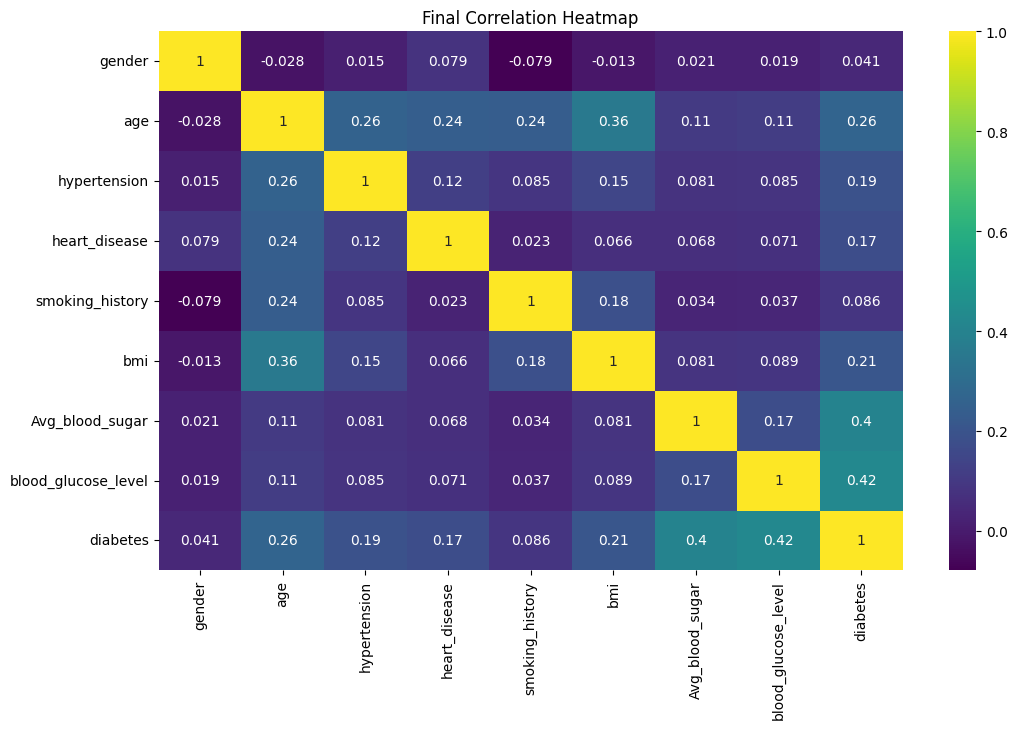

In [61]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap = 'viridis')
plt.title("Final Correlation Heatmap")
plt.show()

## Feature Extraction

In [39]:
threshold = 0.1
correlation_matrix = df.corr()
high_correlation_features = correlation_matrix.index[abs(correlation_matrix['diabetes'])>threshold].tolist()
high_correlation_features.remove('diabetes')
print(high_correlation_features)

X = df[high_correlation_features]
Y = df['diabetes']

['age', 'hypertension', 'heart_disease', 'bmi', 'Avg_blood_sugar', 'blood_glucose_level']


## Data Splitting

In [40]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
import warnings


x_train , x_test , y_train , y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=55)

In [41]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(75839, 6)
(75839,)
(18960, 6)
(18960,)


## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

logistic_regr = LogisticRegression()
logistic_regr.fit(x_train,y_train)

LogisticRegression()

### Logistic Regression Evaluation

In [43]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

y_pred = logistic_regr.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.9581223628691983


### Logistic Regression Coefficient Visualization

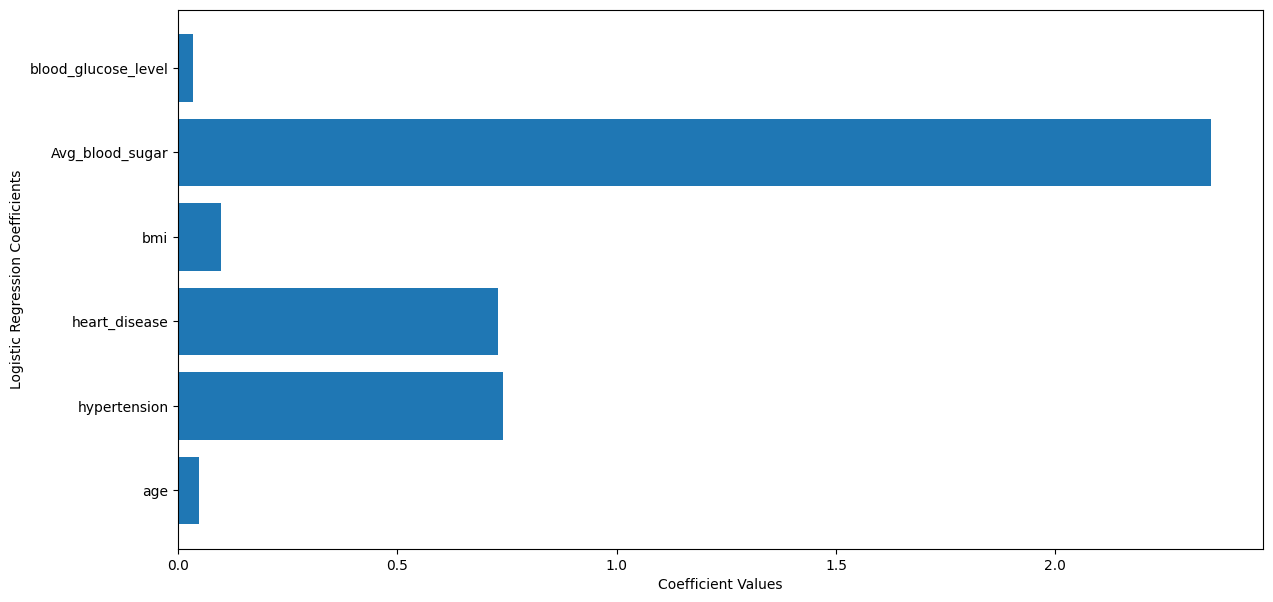

In [44]:
coefs = logistic_regr.coef_[0]
plt.figure(figsize=(14,7))
plt.barh(['age','hypertension','heart_disease','bmi','Avg_blood_sugar','blood_glucose_level'],coefs)
plt.xlabel("Coefficient Values")
plt.ylabel("Logistic Regression Coefficients")
plt.show()

### Logistic Regression Interpretation

### 1- Avg_blood_sugar: Highest, Most influential feature, greatly increases the likelihood of the outcome.
##### 2- heart_disease: Moderate, Significant positive influence.
##### 3- hypertension: Moderate, Also contributes positively.
#### 4- bmi: Gives small positive effect.
#### 5- blood_glucose_level: Almost Negligible influence.
#### 6- age: Little impact in this model.

## Support Vector Machine

In [45]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train,y_train)

SVC()

### Support Vector Machine Evaluation

In [46]:
y_pred1 = svm.predict(x_test)
print(accuracy_score(y_test,y_pred1))

0.9464662447257384


### Support Vector Machine Visualization

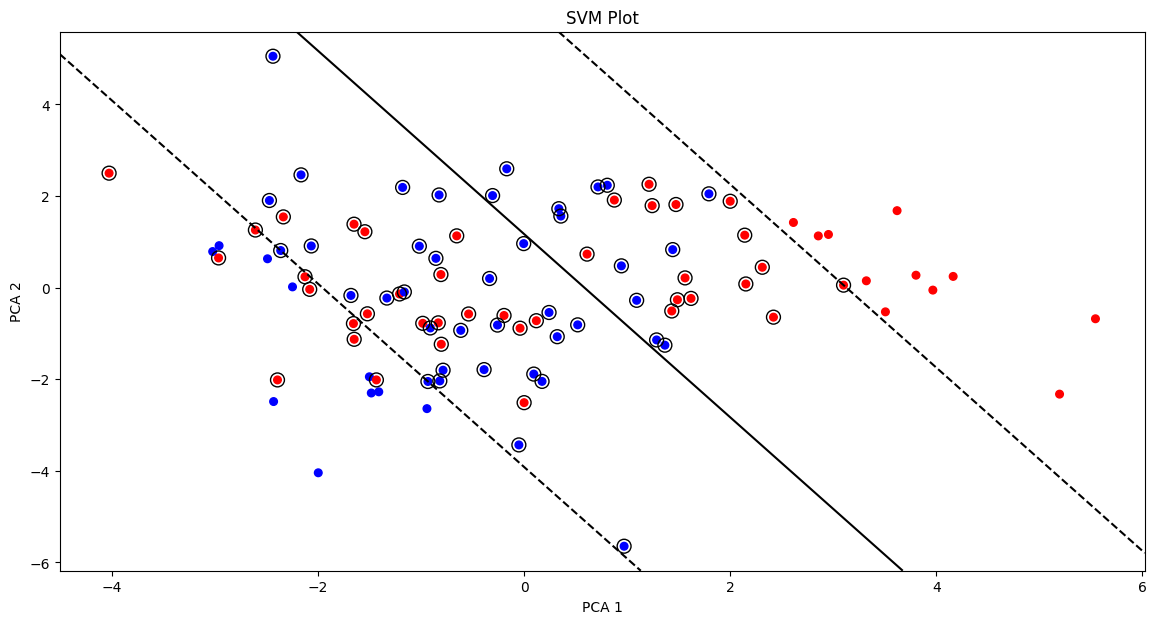

In [47]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

X , y = make_classification(n_samples=100, n_features=6, n_redundant=0,
                           n_informative=5, random_state=42)

# Step 2: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Step 3: Train SVM on 2D data
model = SVC(kernel='linear')
model.fit(X_2D, y)

# Step 4: Plot decision boundary
def plot_svm(model, X, y):
    plt.figure(figsize=(14,7))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30)

    # Create meshgrid
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 500),
                         np.linspace(ylim[0], ylim[1], 500))
    xy = np.c_[xx.ravel(), yy.ravel()]
    Z = model.decision_function(xy).reshape(xx.shape)

    # Plot decision boundary and support vectors
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k')
    plt.title("SVM Plot")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_svm(model, X_2D, y)


### Support Vector Machine Interpretation

#### -> Axes:
PCA 1 the first principal component represents the direction of maximum variance in the data.
PCA 2 second principal component represents the next direction of variance.

#### -> Data Points:
The points are plotted in the reduced 2D space after the PCA transformation.
The values on the y-axis (PCA2 ) ranges from -6 t 4, x-axis (PCA 1) ranges from -4 to 6.

#### -> Decision Boundary:
The Decision boundary separates the classes in the PCA transormed space.

#### Possible interpretation:
The plot shows how well the SVM separates the ffeatures after dimensionality reduction via PCA.
If the points are clearly separated with a gap, the SVM performs well. Overlapping points would indicate classification challenges.

## K-Nearest Neighbors

In [48]:
from sklearn.neighbors import KNeighborsClassifier

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train ,y_train)

KNeighborsClassifier(n_neighbors=3)

### K-Nearest Neighbors Evaluation

In [49]:
y_pred2 =knn.predict(x_test)
print(accuracy_score(y_test ,y_pred2))

0.9530590717299579


### K-Nearest Neighbors Visualization

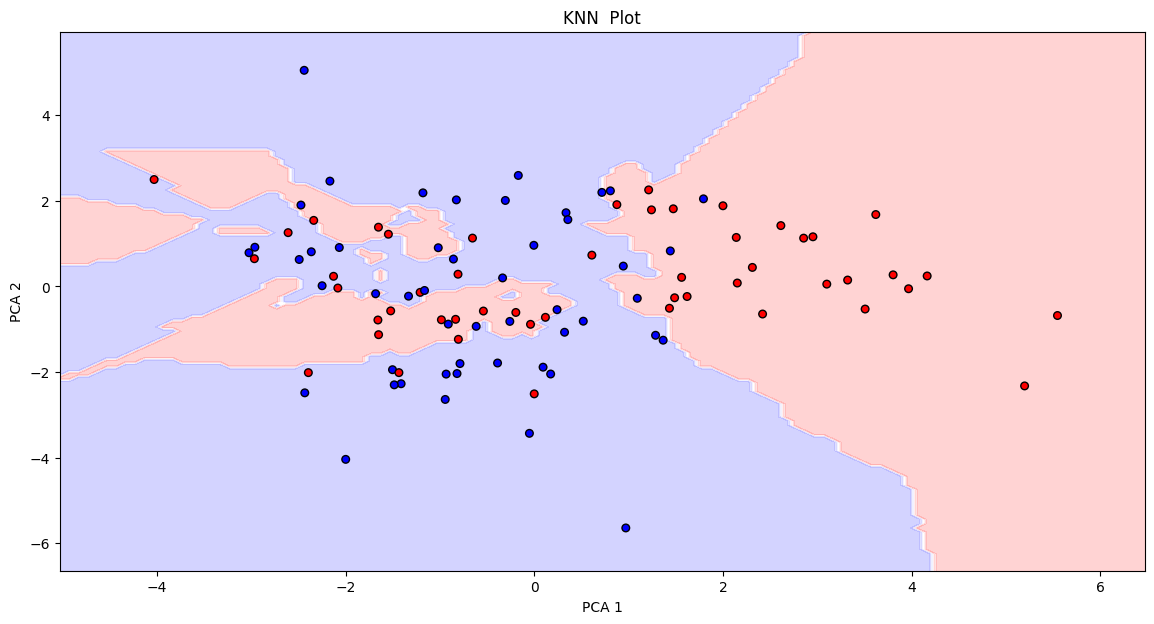

In [50]:
X, y = make_classification(n_samples=100, n_features=6, n_redundant=0,
                           n_informative=5, random_state=42)

# Step 2: Reduce to 2D
pca = PCA(n_components=2)
X_2D = pca.fit_transform(X)

# Step 3: Train KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_2D, y)

# Step 4: Plot decision boundary
def plot_knn(model, X, y):
    h = 0.1  # Mesh step size

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model_knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(14, 7))
    plt.contourf(xx, yy, Z, cmap='bwr', alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=30, edgecolor='k')
    plt.title("KNN  Plot")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()

plot_knn(model, X_2D, y)


### KNN Interpretation

#### -> How KNN works:
The algorithm classifies points based on the majority class of their K nearest neighbors.
The plot includes a background color gradient showing regions where the KNN model assigns different classes.
If the points of the same class cluster together, KNN performs well. Overlapping clusters indicates classification challenges.

#### -> Model Behvior:
Tight clusters ---> Good performance
Dispered points ---> Potential Misclassifications for feature engineering

## Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train , y_train)

RandomForestClassifier()

### Random Forest Classifier Evaluation

In [52]:
y_pred_rf =rf.predict(x_test)
print(accuracy_score(y_test ,y_pred_rf))

0.9674050632911393


### Random Forest Classifier Interpretation:

#### -> A Random Forest builds many decision trees (often hundreds or thousands) and combines their predictions to make a final decision.
#### -> Each tree is trained on a random subset of the data and features, introducing diversity to improve robustness.
#### -> The algorithm creates multiple subsets of the training data by random sampling with replacement.
#### -> Each tree is trained on a different subset, ensuring variability.
#### ->  At each split in a decision tree, only a random subset of features is considered, This prevents one dominant feature from controlling all trees and reduces correlation between trees.

## Classification Report 

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17313
           1       0.86      0.62      0.72      1647

    accuracy                           0.96     18960
   macro avg       0.91      0.80      0.85     18960
weighted avg       0.96      0.96      0.95     18960



## Confusion Matrix

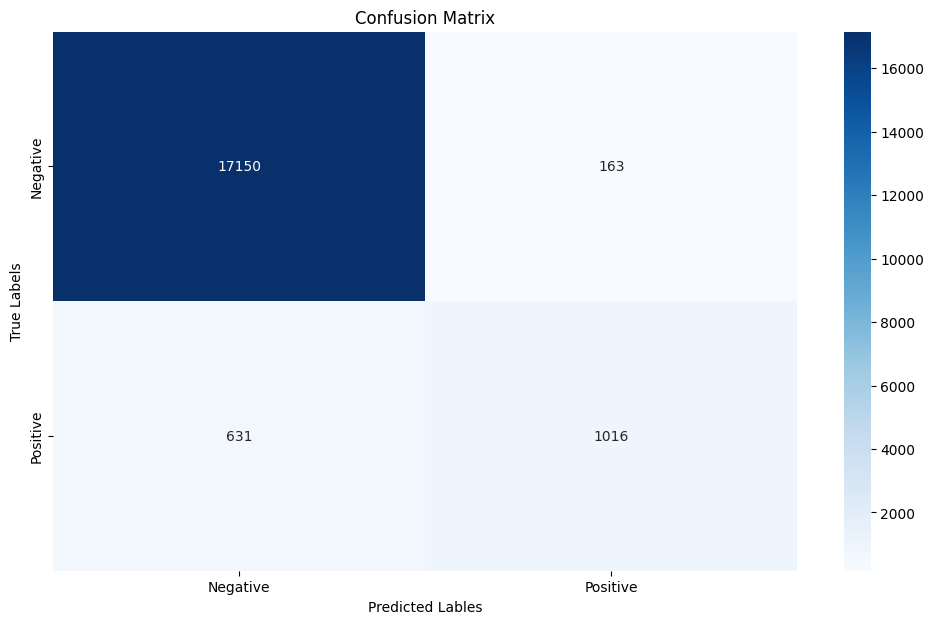

[[17150   163]
 [  631  1016]]


In [54]:
con_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,7))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.show()


print(con_matrix)

### Key Metrics & Interpretation of Confusion Matrix

#### 1- True Negative (TN = 17,150): Correctly predicted "Negative" cases.
#### 2- False Positive (FP = 631): "Negative" cases incorrectly predicted as "Positive" (Type I error).
#### 3- False Negative (FN = 163): "Positive" cases incorrectly predicted as "Negative" (Type II error).
#### 4- True Positive (TP = 1,016): Correctly predicted "Positive" cases.

### Class Imbalance:
#### 1- The model handles "Negative" class well (high TN) but struggles with "Positive" class (lower TP).
#### 2- This suggests the dataset may be imbalanced (far more "Negative" samples).
### Error Analysis:
#### 1- FP (631): Misclassified negatives (could be costly if "Positive" is critical, e.g., disease diagnosis).
#### 2- FN (163): Missed positives (critical if "Positive" is rare but important, e.g., fraud detection).